# Análisis de bolsa CEMEX y HOMEX

## Objetivo general:

Generar un análisis ponerado en base a datos de yahoo finance de las empresas CEMEX y HOMEX, dos de las empresas mas influyentes en México en el sector de la construcción.

## Objetivos especificos 

+ Generar gráficos que permitan entender el comportamiento de las acciones de las empresas mencionadas-
+ Obtener los valores de desviacion estandar y media-
+ Generar una simulación de escenarios para cada empresa-
+ Proyectar como se comportaran las acciones al cierre de este año 2019
+ Determinar la probabilidad de que se supere el precio umbral que sera del 110% con respecto al ultimo valor de cierre del 2018 durante la simulación de 2019.

## Librerias necesarias

In [28]:
import pandas as pd
import pandas_datareader as web
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Extracción de datos mediante YAHOO FINANCE

In [2]:
def get_close(names,start,end):
    close = web.DataReader(name = names, data_source="yahoo",start=start,end=end)
    return close["Adj Close"]

In [3]:
# Descargamos datos...
# Instrumento: Amazon
nombres = ["CEMEXCPO.MX","HOMEX.MX"]
# Fechas de interés (inicio y fin): 2013-2017
fecha_inicio = "2014-1-1"
fecha_fin = "2018-12-31"

# Función DataReader
cierre = get_close(nombres,fecha_inicio,fecha_fin)
cierre

Symbols,CEMEXCPO.MX,HOMEX.MX
Date,,
2014-01-02,12.762120,23.600000
2014-01-03,12.753624,23.700001
2014-01-06,12.812809,23.500000
2014-01-07,12.812809,23.200001
2014-01-08,12.990170,23.400000
2014-01-09,13.420873,23.100000
2014-01-10,13.758796,24.200001
2014-01-13,13.361786,23.900000
2014-01-14,13.792588,23.299999


## Comportamineto de las acciones periodo 2014-2018

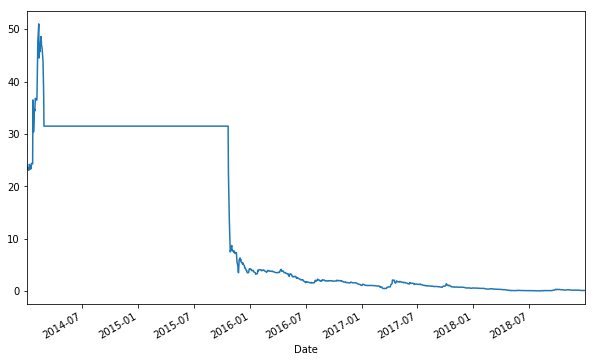

In [4]:
cierre["HOMEX.MX"].plot(figsize=(10,6));

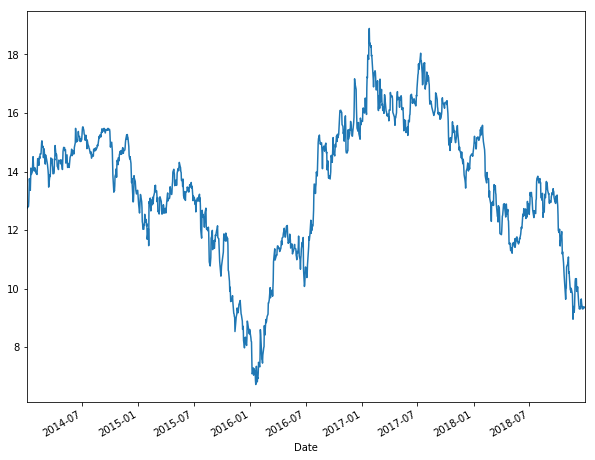

In [5]:
cierre["CEMEXCPO.MX"].plot(figsize=(10,8));

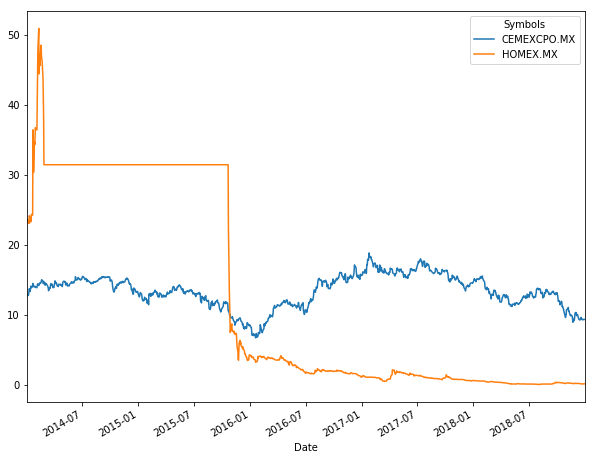

In [6]:
cierre.plot(figsize=(10,8));

## Simulación de rendimientos diarios

In [7]:
St = cierre
St1 = cierre.shift()

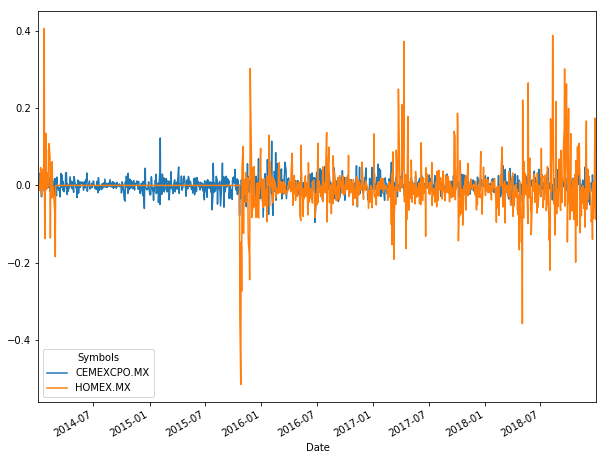

In [8]:
Ret = (np.log(St/St1)).dropna()
Ret.plot(figsize=(10,8));

## Obtención de la desviación estandar y la media 

In [9]:
mu_CEMEX = Ret.mean()["CEMEXCPO.MX"]
mu_HOMEX = Ret.mean()["HOMEX.MX"]

mu_CEMEX,mu_HOMEX

(-0.00024560629560887125, -0.004035900936119652)

In [29]:
std_CEMEX = Ret.std()["CEMEXCPO.MX"]
std_HOMEX = Ret.std()["HOMEX.MX"]

std_CEMEX,std_HOMEX 

(0.019754902023078297, 0.055537233820569576)

## Simulación de escenarios

In [10]:
def ret_sim(mu,std,ndays,nscen,fecha_inicio):
    dias = pd.date_range(start=fecha_inicio, periods = ndays)
    f_norm = std*np.random.randn(ndays,nscen) + mu
    return pd.DataFrame(data=f_norm,index=dias)

In [12]:
ndays = 365
nscen = 100
fecha_inicio = "2019-1-1"

sim_Ret_CEMEX = ret_sim(mu_CEMEX,std_CEMEX,ndays,nscen,fecha_inicio) 
sim_Ret_CEMEX



,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-01-01,0.021449,-0.023575,0.014993,-0.024343,-0.017828,0.027854,-0.012705,-0.014525,-0.003509,0.010140,...,0.024084,-0.031643,-0.027568,0.015617,-0.020477,0.001578,-0.007649,-0.026905,-0.013030,-0.012093
2019-01-02,-0.004490,0.013835,-0.022959,-0.018871,-0.004883,0.014017,-0.029796,-0.009843,0.004682,0.047016,...,-0.014256,-0.016999,0.038978,0.034151,0.001899,-0.001294,0.003400,-0.005883,-0.011760,0.011640
2019-01-03,-0.042588,0.015862,0.014393,0.012473,0.010963,0.036764,0.043091,0.022480,-0.018393,0.022861,...,-0.001554,0.040757,0.014949,-0.007273,-0.025441,0.008978,0.014316,-0.039284,0.004838,0.006044
2019-01-04,-0.000729,-0.030895,-0.011895,0.011137,0.012970,-0.019113,0.001506,0.025191,0.025662,-0.011414,...,0.050258,-0.004729,0.015145,-0.020230,-0.021098,0.001659,-0.034965,0.007183,0.036682,0.005925
2019-01-05,0.019844,0.017238,-0.016067,0.008367,0.000585,0.001096,-0.015922,-0.016876,-0.038985,0.000170,...,0.002026,0.008338,-0.017790,-0.056179,-0.006275,0.031645,-0.005808,0.021320,0.000018,0.005894
2019-01-06,-0.032062,0.005832,0.003790,-0.000431,0.009738,0.006046,-0.024657,0.018433,0.015104,-0.041311,...,-0.039795,-0.032051,0.021778,0.001042,-0.027130,0.036127,0.006832,0.009944,0.036454,0.025484
2019-01-07,0.019675,0.037613,-0.004153,0.035112,0.004948,0.005063,0.011887,0.012075,0.020573,0.019371,...,-0.012973,-0.013613,-0.010891,0.026640,-0.009881,0.016701,0.001151,-0.017822,-0.014810,-0.001286
2019-01-08,0.002549,-0.003556,0.027735,-0.002747,-0.018345,-0.007977,0.022058,-0.002641,-0.010590,0.010264,...,-0.014701,-0.007272,0.026367,0.001033,-0.020772,0.026255,0.008893,-0.023440,0.001363,0.023210
2019-01-09,0.017397,0.047210,0.012256,-0.016493,0.029584,0.015520,-0.011820,-0.007330,0.038301,-0.006349,...,0.039342,0.002981,0.003486,0.053013,0.009365,-0.003015,0.027286,0.007128,-0.001963,-0.004390
2019-01-10,-0.012604,0.022228,-0.014380,-0.006827,-0.005158,-0.006938,-0.003122,0.024597,0.020915,-0.008727,...,-0.014800,0.016640,-0.007401,0.015045,0.004852,0.046076,-0.013284,0.042241,-0.003849,-0.024170


In [13]:
sim_Ret_HOMEX = ret_sim(mu_HOMEX,std_HOMEX,ndays,nscen,fecha_inicio) 
sim_Ret_HOMEX

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-01-01,0.039879,0.024574,0.128656,-0.058930,-0.068684,0.082454,-0.112697,0.112537,-0.053791,0.047607,...,-0.000220,0.002454,-0.034393,0.025407,-0.033624,0.024600,0.057012,0.050114,0.022996,0.043941
2019-01-02,0.090989,-0.012975,-0.048209,-0.023379,-0.002672,-0.070919,0.019780,0.116296,-0.025898,-0.035004,...,-0.013707,-0.103504,0.041597,-0.001124,0.046115,-0.041244,-0.010189,0.028381,-0.018709,0.080167
2019-01-03,-0.021828,-0.072326,0.029967,0.021881,-0.110017,0.050292,-0.008767,0.021639,-0.087333,0.016857,...,-0.027969,-0.048781,-0.026744,-0.081459,0.053480,-0.017305,-0.046261,0.003839,0.001495,0.082126
2019-01-04,0.032163,0.141829,-0.049999,-0.145976,0.071355,-0.051256,0.014527,0.014705,-0.165401,0.047834,...,0.017656,0.011353,-0.052119,0.050227,0.018041,0.048994,-0.074742,-0.009246,0.022234,0.049993
2019-01-05,0.052998,-0.019163,0.002300,-0.049566,-0.006532,0.063668,0.029583,0.056405,0.008014,0.004753,...,0.107011,-0.033407,-0.065072,0.095870,-0.033173,0.108981,-0.069039,-0.002971,0.019227,0.061037
2019-01-06,0.004591,0.081566,-0.006984,0.000049,-0.006790,0.056982,-0.015702,-0.015235,-0.027109,-0.067204,...,0.026829,0.004582,0.057352,0.068426,0.047500,0.020107,-0.077334,0.025066,-0.068429,-0.025763
2019-01-07,-0.038540,0.023518,0.083742,-0.011713,0.000661,-0.060074,-0.035802,-0.053133,0.035328,-0.040574,...,0.065929,-0.005146,-0.045035,-0.123619,0.006806,-0.056584,-0.044916,-0.053920,0.062758,-0.044425
2019-01-08,0.011299,-0.021720,-0.080365,0.112327,-0.025539,0.016401,-0.053476,0.003816,0.049228,-0.036122,...,-0.091003,0.021112,0.064962,-0.046434,-0.015362,0.032744,-0.052077,0.001750,-0.012573,0.002119
2019-01-09,-0.092715,-0.033636,0.107986,-0.011995,-0.010355,0.065860,0.015834,-0.023088,-0.013152,0.046089,...,-0.071312,-0.045196,-0.068286,0.086655,0.077893,0.137081,-0.053811,-0.041066,0.045558,0.061735
2019-01-10,-0.062485,-0.113885,0.019250,0.029450,-0.039939,0.069106,-0.033219,0.018148,0.100141,0.014211,...,0.040439,-0.045080,-0.097534,0.049276,-0.101117,-0.072461,-0.056789,-0.039764,-0.061508,0.024809


## Análisis de precios para CEMEX

In [30]:
precios_simulados_CEMEX

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-01-01,9.577989,9.155804,9.517448,9.148600,9.209695,9.638049,9.257728,9.240665,9.343964,9.471943,...,9.602699,9.080150,9.118366,9.523305,9.184858,9.391662,9.305138,9.124582,9.254681,9.263472
2019-01-02,9.534982,9.282474,9.298937,8.975957,9.164725,9.773145,8.981881,9.149706,9.387710,9.917279,...,9.465801,8.925801,9.473778,9.848534,9.202300,9.379507,9.336775,9.070901,9.145847,9.371304
2019-01-03,9.128903,9.429708,9.432779,9.087911,9.265195,10.132444,9.368918,9.355388,9.215040,10.143997,...,9.451093,9.289589,9.615404,9.776910,8.968184,9.463717,9.470442,8.714557,9.190091,9.427940
2019-01-04,9.122246,9.138378,9.320572,9.189125,9.385366,9.938785,9.383026,9.591058,9.451520,10.028215,...,9.926085,9.245655,9.761033,9.579125,8.778977,9.479413,9.139304,8.777157,9.527204,9.483800
2019-01-05,9.303264,9.295905,9.170817,9.266011,9.390860,9.949681,9.233631,9.429196,9.083056,10.029924,...,9.946196,9.322745,9.587380,9.040983,8.723885,9.779390,9.086224,8.964289,9.527371,9.539697
2019-01-06,9.004979,9.350124,9.205570,9.262022,9.482312,10.009839,9.005957,9.603001,9.220248,9.615579,...,9.550385,9.023945,9.796178,9.050404,8.487207,10.132689,9.148299,9.053433,9.874679,9.782802
2019-01-07,9.182155,9.701808,9.167337,9.587233,9.529232,10.060517,9.113009,9.718962,9.409941,9.801847,...,9.426485,8.901101,9.689486,9.291503,8.403344,10.301914,9.158830,8.892082,9.728432,9.770217
2019-01-08,9.205560,9.667308,9.421592,9.560893,9.354419,9.980265,9.314026,9.693297,9.310293,9.902457,...,9.287904,8.836371,9.944970,9.301102,8.228789,10.572389,9.240275,8.683651,9.741689,9.996981
2019-01-09,9.365713,10.123706,9.537058,9.403203,9.631160,10.135154,9.203935,9.622240,9.666887,9.839588,...,9.653306,8.862716,9.979641,9.794182,8.305853,10.540514,9.492402,8.745546,9.722570,9.953095
2019-01-10,9.247665,10.348736,9.399920,9.339004,9.581478,10.064837,9.175201,9.858919,9.869067,9.753715,...,9.510433,9.010196,9.905778,9.941531,8.346156,11.026179,9.366309,9.114964,9.685143,9.712531


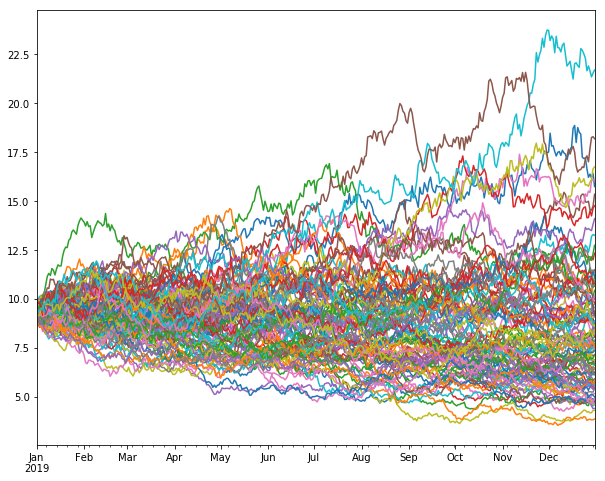

In [17]:
# Obtenemos los precios
precios_simulados_CEMEX = cierre.iloc[-1]["CEMEXCPO.MX"]*((sim_Ret_CEMEX+1).cumprod())
precios_simulados_CEMEX

# Graficar
precios_simulados_CEMEX.plot(figsize=(10,8),legend=False);

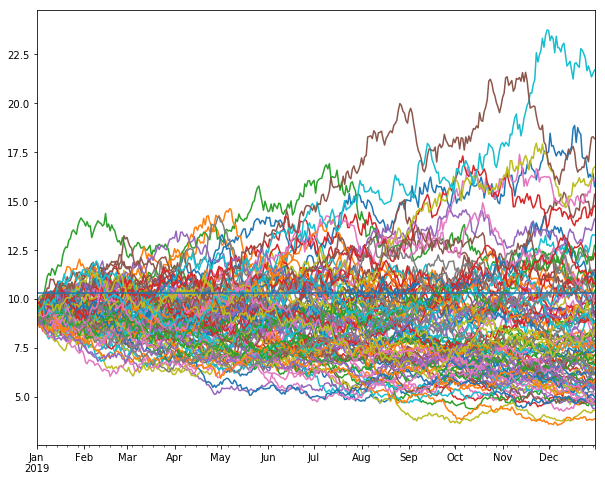

In [20]:
# Umbral de 110% del ultimo precio
K = cierre.iloc[-1]["CEMEXCPO.MX"]*1.1

# Fechas
dates = precios_simulados_CEMEX.index
# DataFrame de Umbrales
umbral = pd.DataFrame(index = dates, columns=['K'],data=K*np.ones(len(dates)))

# Concatenar y graficar
precios_simulados_KCEMEX = pd.concat([precios_simulados_CEMEX.T,umbral.T]).T

precios_simulados_KCEMEX.plot(figsize=(10,8),legend=False);

## Probabilidad de superar el precio umbral

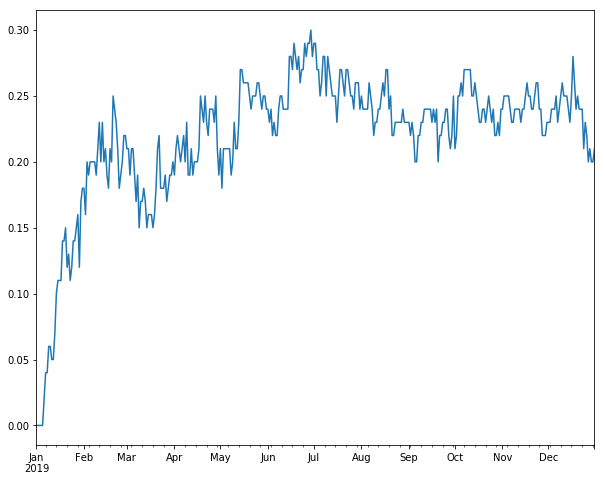

In [26]:
# Comparar cada escenario en cada fecha
TF = precios_simulados_CEMEX>K
TF
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,8),legend=False);

## Análisis de precios HOMEX

In [16]:
precios_simulados_HOMEX = cierre.iloc[-1]["HOMEX.MX"]*((sim_Ret_HOMEX+1).cumprod())
precios_simulados_HOMEX

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2019-01-01,0.154942,0.152662,0.168170,0.140219,0.138766,0.161286,0.132208,0.165768,0.140985,0.156093,...,0.148967,0.149366,0.143875,0.152786,0.143990,0.152665,0.157495,0.156467,0.152426,0.155547
2019-01-02,0.169040,0.150681,0.160063,0.136941,0.138395,0.149847,0.134823,0.185046,0.137334,0.150630,...,0.146925,0.133906,0.149860,0.152614,0.150630,0.146369,0.155890,0.160908,0.149575,0.168017
2019-01-03,0.165350,0.139783,0.164859,0.139938,0.123169,0.157384,0.133641,0.189050,0.125340,0.153169,...,0.142816,0.127374,0.145852,0.140182,0.158686,0.143836,0.148678,0.161526,0.149798,0.181815
2019-01-04,0.170668,0.159608,0.156616,0.119510,0.131958,0.149317,0.135583,0.191830,0.104609,0.160495,...,0.145337,0.128820,0.138251,0.147223,0.161549,0.150883,0.137566,0.160032,0.153129,0.190905
2019-01-05,0.179713,0.156549,0.156977,0.113587,0.131096,0.158823,0.139594,0.202651,0.105447,0.161258,...,0.160890,0.124516,0.129254,0.161337,0.156190,0.167326,0.128068,0.159557,0.156073,0.202557
2019-01-06,0.180538,0.169318,0.155880,0.113592,0.130206,0.167873,0.137402,0.199563,0.102589,0.150421,...,0.165207,0.125087,0.136667,0.172377,0.163609,0.170691,0.118164,0.163556,0.145393,0.197339
2019-01-07,0.173580,0.173300,0.168934,0.112262,0.130292,0.157789,0.132483,0.188960,0.106213,0.144318,...,0.176099,0.124443,0.130512,0.151068,0.164722,0.161032,0.112857,0.154737,0.154518,0.188572
2019-01-08,0.175542,0.169536,0.155358,0.124872,0.126965,0.160376,0.125398,0.189681,0.111441,0.139105,...,0.160073,0.127070,0.138991,0.144053,0.162192,0.166305,0.106980,0.155008,0.152575,0.188971
2019-01-09,0.159266,0.163834,0.172134,0.123374,0.125650,0.170939,0.127383,0.185301,0.109976,0.145516,...,0.148658,0.121327,0.129500,0.156536,0.174825,0.189103,0.101223,0.148642,0.159526,0.200638
2019-01-10,0.149315,0.145175,0.175448,0.127007,0.120631,0.182752,0.123152,0.188664,0.120989,0.147584,...,0.154669,0.115858,0.116869,0.164250,0.157148,0.175400,0.095475,0.142732,0.149714,0.205615


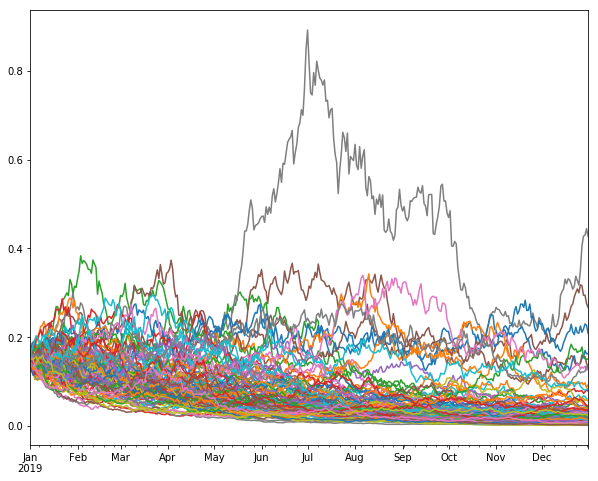

In [18]:
# Graficar
precios_simulados_HOMEX.plot(figsize=(10,8),legend=False);

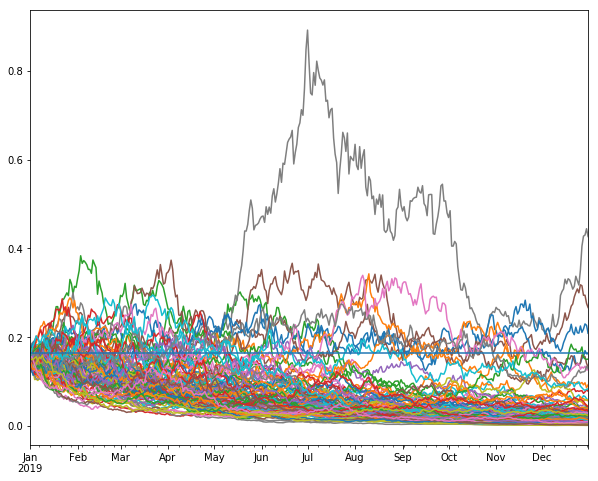

In [22]:
# Umbral de 110% del ultimo precio
K1 = cierre.iloc[-1]["HOMEX.MX"]*1.1

# Fechas
dates = precios_simulados_HOMEX.index
# DataFrame de Umbrales
umbral = pd.DataFrame(index = dates, columns=['K1'],data=K1*np.ones(len(dates)))

# Concatenar y graficar
precios_simulados_KHOMEX = pd.concat([precios_simulados_HOMEX.T,umbral.T]).T

precios_simulados_KHOMEX.plot(figsize=(10,8),legend=False);

## Probabilidad de superar el precio umbral

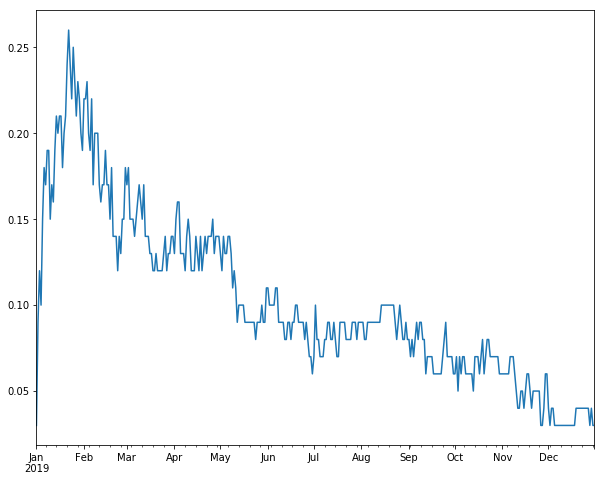

In [27]:
# Comparar cada escenario en cada fecha
TF1 = precios_simulados_HOMEX>K1
TF1
# Sumamos para cada fecha y dividimos entre el número de escenarios
prob = pd.DataFrame(TF1.sum(axis=1)/100)
# Gráfico de probabilidad
prob.plot(figsize=(10,8),legend=False);

## Conclusiones:

Analizando los resultados podemos observar que en ambos casos las empresas no muestran una tendencia a la alta en las simulaciones generadas permitiendonos generar un análisis de la probabilidad de que se superase el precio umbral. sin embargo los resultados obtenidos no son prometedores. Cemex en ningun momento del año logra superar el precio umbral en mas del 30% de los casos y Homex no se encuentra en mejor situacion teniendo una caida en picada al cierre del año superando el precio umbral en solo el 5% de los casos.


In [32]:
# Descargamos datos...
# Instrumento: Amazon
nombres = ["CEMEXCPO.MX","HOMEX.MX"]
# Fechas de interés (inicio y fin): 2013-2017
fecha_inicio = "2019-1-1"
fecha_fin = "2019-07-10"

# Función DataReader
cierre2019 = get_close(nombres,fecha_inicio,fecha_fin)
cierre2019

Symbols,CEMEXCPO.MX,HOMEX.MX
Date,,
2019-01-02,9.653527,0.156
2019-01-03,9.465793,0.145
2019-01-04,9.495435,0.151
2019-01-07,9.772097,0.163
2019-01-08,9.989473,0.162
2019-01-09,10.078401,0.161
2019-01-10,10.038877,0.159
2019-01-11,9.920308,0.151
2019-01-14,9.831381,0.152


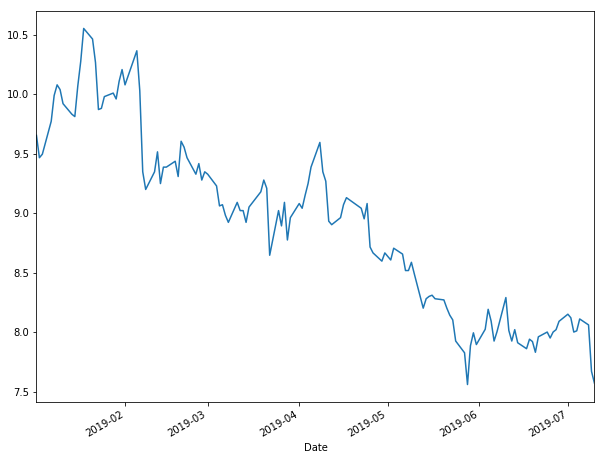

In [41]:
(cierre2019["CEMEXCPO.MX"]).plot(figsize=(10,8));



In [43]:
K

10.314551925659181

Podemos observar que solo se supera el precio umbral durante febrero y marzo para despues caer en picada hasta la fecha del 10 de julio de 2019

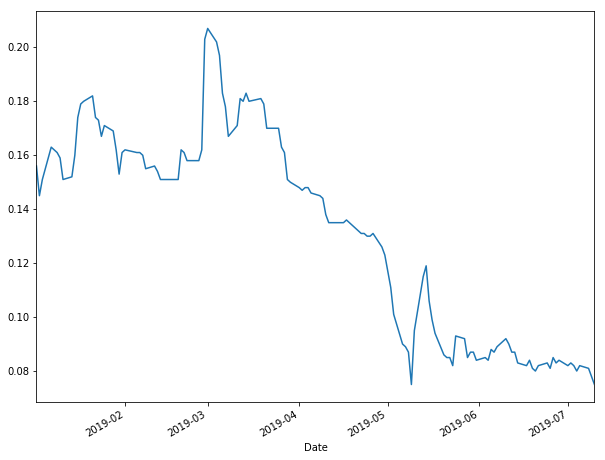

In [44]:
(cierre2019["HOMEX.MX"]).plot(figsize=(10,8));

In [45]:
K1

0.16390000432729723

En el caso de HOMEX podemos observar que la simulación fue muy acertada el precio umbral se supera de manera estable durante los primeros 5 meses del 2019 para presentar una caida drastica perdiendo el 50% de su valor hasta la fecha del 10 de julio de 2019

## Referencias:
+ http://pandas.pydata.org/
+ http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/